# Titanic Data Analysis

### Introduction to Data Set & Analysis

The Titanic data set contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The most important variable is the binary variable "Survived", with 1 indicating that this passenger survived and 0 indicating otherwise. Other variables, such as sex, group and fare, might be useful in prerdicting the survival of that passenger.

First, I would like to brainstorm a serial of question regarding this data set.

1. What is the percentage of people survived?
2. What are the summary statistics of passenger class, sex, age, number of siblings/spouses abroad, number of parents/children abroad, passenger fare, port of embarkation?
3. What factors determine the likelihood of survival?
4. We have all heard of the saying "Women and children first." Are women more likely to survive than men? Are the survival rate different across age groups?
5. Are people with higher fare more likely to survive? What about people with higher passenger class?
6. Are people with big family more or less likely to survive?

In [1]:
# Import packages

import numpy as np 
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/xiangli/Downloads'

In [3]:
# Import data and discplay the first few rows

titanic = pd.read_csv('/Users/xiangli/Desktop/bootcamp/Udacity Nanodegree/P2/data set/titanic-train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Wrangling Process

During the data wrangling process, I want to take a close look at the data set and make changes to data type and missing value when neccessary. After we clean the data set, our model will generate more accurate results.

In [4]:
# Exam missing data

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As we can see, age is missing 177 data points, cabin is missing 687 data points and embarked is missing 2 data points.

Since cabin is missing 687 out of 891 data points, the best solution is perhaps just to exclude this variable in our analysis.

Embarked is only missing 2 data points, therefore we can make some educated guesses and replace these missing values with the mode. We could also drop this entire variable or drop these 2 data points, but then we will lose the value provided from this variable or other variables of these data points. In my opinion, it is worthwhile to estimate these 2 embarked value if we can gain values from other variables. 

Lastly, we need to do something clever with the 177 missing age variable, since age might be an important variable. But first, let's go ahead and drop the cabin variable and drop the 2 rows with missing embarked values.

In [5]:
# Drop the cabin variable

titanic_clean1 = titanic.drop(['Cabin'], axis = 1)

In [6]:
# Drop the 2 data points with missing embarked values

titanic_clean2 = titanic_clean1[pd.notnull(titanic_clean1['Embarked'])]

In [7]:
# Display the first few rows of the new cleaning data set to make sure data was cleaned appropriately

titanic_clean2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


To figure out how to best estimate age for the 177 missing values, let's first look at the distribution of age.

Populating the interactive namespace from numpy and matplotlib


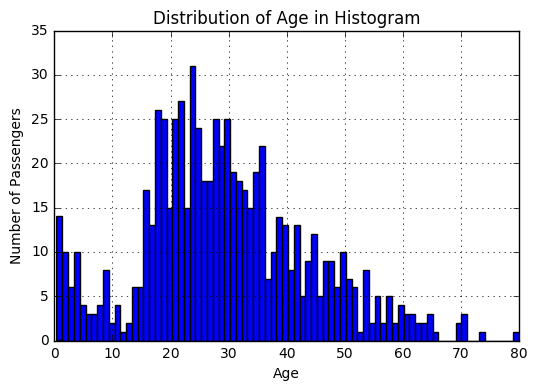

In [8]:
# Exam the distribution of age - histogram

%matplotlib inline
%pylab inline

ax = titanic_clean2['Age'].hist(bins = 80)
ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age in Histogram')

Populating the interactive namespace from numpy and matplotlib


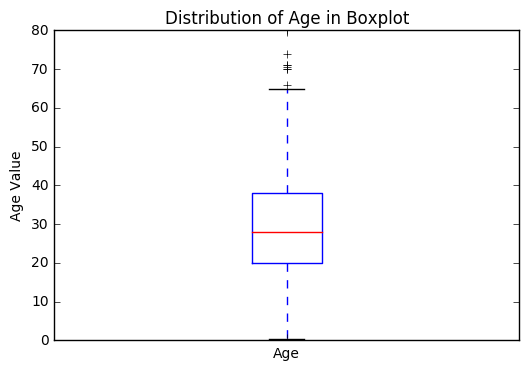

In [9]:
# Exam the distribution of age - boxplot

%matplotlib inline
%pylab inline

bp = titanic_clean2['Age'].plot.box()
bp.set_ylabel('Age Value')
bp.set_title('Distribution of Age in Boxplot')

With the histogram and boxplot of age in hand, let's look at the summary statistics.

In [10]:
# Summary statistics of age 

titanic_clean2.Age.describe()

/Users/xiangli/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

Oops, looks like we are gettting NaN for our summary statistics. I suspect that this is due to missing values. I will run the summary statistics again without the missing values.

In [11]:
# Summary statistics of age excluding missing values

var_age_no_missing = titanic_clean2.Age[~np.isnan(titanic_clean2.Age)]

var_age_no_missing.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The median age is 28-year old. One of the ways to replace the missing age values are to replace all of them with the median - 28. I will go ahead with this approach for now.

In [12]:
# Fill in missing age value with median

titanic_clean2['Age'].fillna(28, inplace = True)

/Users/xiangli/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
# Display the info of the updated age variable

titanic_clean2[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 1 columns):
Age    889 non-null float64
dtypes: float64(1)
memory usage: 13.9 KB


Now, there is no missing data in age variable since we replaced those with the median.

Lastly, I will split the data into training and testing set.

In [14]:
# Split the data randomly

np.random.seed(500)
titanic.is_train = np.random.uniform(0, 1, len(titanic_clean2)) <= .7
titanic_train = titanic_clean2[titanic.is_train]
titanic_test = titanic_clean2[titanic.is_train == False]

In [15]:
# Display the first few rows of training data set

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
# Display training data set info

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 889
Data columns (total 11 columns):
PassengerId    635 non-null int64
Survived       635 non-null int64
Pclass         635 non-null int64
Name           635 non-null object
Sex            635 non-null object
Age            635 non-null float64
SibSp          635 non-null int64
Parch          635 non-null int64
Ticket         635 non-null object
Fare           635 non-null float64
Embarked       635 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 59.5+ KB


In [17]:
# Display the first few rows of testing data set

titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S


In [18]:
# Display testing data set info

titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 10 to 890
Data columns (total 11 columns):
PassengerId    254 non-null int64
Survived       254 non-null int64
Pclass         254 non-null int64
Name           254 non-null object
Sex            254 non-null object
Age            254 non-null float64
SibSp          254 non-null int64
Parch          254 non-null int64
Ticket         254 non-null object
Fare           254 non-null float64
Embarked       254 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 23.8+ KB


### Data Exploration Process & Predictions

Now we have a clean data set to work with. We can start the data exploration process and begin answering the questions proposed earlier.

Question 1: 
What is the percentage of people survived?

In [19]:
survived_pa = titanic_clean2.Survived

In [20]:
# Calculate total number of passengers survived

sum(survived_pa)

340

In [21]:
# Calculate total number of passengers

num_row = len(titanic_clean2)
print num_row

889


In [22]:
# Calculate the percentage survived

print sum(survived_pa) * 100 / num_row 

38


According to our calculation on the cleaned data set, 38% of passengers survived.

Question 2: 
What are the summary statistics of passenger class, sex, age, number of siblings/spouses abroad, number of parents/children abroad, passenger fare, port of embarkation?

In this question, notice we excluded passenger id because it's just an identifier and doesn't provide much value to the analysis other than being a label. We excluded name because it's a string variable and would be hard to summarize. We excluded ticket because it appears to be strings and kind of random. We also excluded cabin earlier due to too many missing values.

In [23]:
# Summary statistics - numercial data

titanic[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,7.910400
50%,NaN,0.000000,0.000000,14.454200
75%,NaN,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [24]:
# Summary statistics - categorical data

titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Question 3: What factors determine the likelihood of survival?

I will approach this question using a decision tree classifier model.

In [27]:
# Import 'sklearn' package

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.externals.six import StringIO

In [28]:
# Double check the column names I have

titanic_train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked'],
      dtype='object')

In [29]:
# Extract the columns needed and convert categorical variables into dummy variables on training data set

X = titanic_train[['Age', 'SibSp', 'Parch', 'Fare']] 

In [30]:
Z1 = pd.get_dummies(titanic_train.Pclass)

In [31]:
Z2 = pd.get_dummies(titanic_train.Sex)

In [32]:
Z3 = pd.get_dummies(titanic_train.Embarked)

In [33]:
X = pd.concat([X, Z1, Z2, Z3], axis = 1)

In [34]:
# Display columns that will go into the model as predictors on training set

print X.head()

    Age  SibSp  Parch     Fare    1    2    3  female  male    C    Q    S
0  22.0      1      0   7.2500  0.0  0.0  1.0     0.0   1.0  0.0  0.0  1.0
1  38.0      1      0  71.2833  1.0  0.0  0.0     1.0   0.0  1.0  0.0  0.0
2  26.0      0      0   7.9250  0.0  0.0  1.0     1.0   0.0  0.0  0.0  1.0
3  35.0      1      0  53.1000  1.0  0.0  0.0     1.0   0.0  0.0  0.0  1.0
4  35.0      0      0   8.0500  0.0  0.0  1.0     0.0   1.0  0.0  0.0  1.0


In [35]:
# Build a decision tree classifier model & train the model on training data set

dtc = tree.DecisionTreeClassifier()
Y = titanic_train[['Survived']]

In [36]:
print Y.head()

   Survived
0         0
1         1
2         1
3         1
4         0


In [37]:
# Fit the model

dt = dtc.fit(X, Y)
print dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [38]:
# Display the importances of features

dt.feature_importances_

array([ 0.25976083,  0.02870536,  0.01627748,  0.26747242,  0.00349116,
        0.0088544 ,  0.09145397,  0.        ,  0.29486509,  0.00086397,
        0.00814605,  0.02010926])

We can see that the importances obtained for these features are:

Age - 0.25347828


SibSp - 0.02149895


Parch - 0.01174219    


Fare - 0.26671481


1 (Pclass) - 0.03978429


2 (Pclass) - 0.00111057


3 (Pclass) - 0.08825938


female - 0.2971882   


male - 0.    


C - 0.00711479    


Q - 0.     


S - 0.01310855

According to the feature importances, the three most important features are age, fare and female.

Now we have a decision tree classifier model trained with the training data set and the feature importances, we can then predict the whether a particular passenger would survive and obtain the accuracy score by comparing the prediction to the true outcome.

In [39]:
# Display testing data set

titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S


In [40]:
# Extract the columns needed and convert categorical variables into dummy variables on training data set

X_test = titanic_test[['Age', 'SibSp', 'Parch', 'Fare']] 

In [41]:
Z1_test = pd.get_dummies(titanic_test.Pclass)

In [42]:
Z2_test = pd.get_dummies(titanic_test.Sex)

In [43]:
Z3_test = pd.get_dummies(titanic_test.Embarked)

In [44]:
X_test = pd.concat([X_test, Z1_test, Z2_test, Z3_test], axis = 1)

In [45]:
# Display columns that will go into the model as predictors on testing data set

print X_test.head()

     Age  SibSp  Parch     Fare    1    2    3  female  male    C    Q    S
10   4.0      1      1  16.7000  0.0  0.0  1.0     1.0   0.0  0.0  0.0  1.0
15  55.0      0      0  16.0000  0.0  1.0  0.0     1.0   0.0  0.0  0.0  1.0
18  31.0      1      0  18.0000  0.0  0.0  1.0     1.0   0.0  0.0  0.0  1.0
22  15.0      0      0   8.0292  0.0  0.0  1.0     1.0   0.0  0.0  1.0  0.0
25  38.0      1      5  31.3875  0.0  0.0  1.0     1.0   0.0  0.0  0.0  1.0


In [46]:
# Predict the outcomes using predictors in testing data set

pred = dt.predict(X_test)

In [47]:
print pred

[0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0]


In the step above, we got a set of predictions on the testing data set!

Finally, we can evaluate the accuracy of the decision tree model. As we can see below, the accuracy score for this model is about 78%, meaning that 78% of the outcomes are predicted correctly.

In [48]:
# Calculate accuracy score

from sklearn.metrics import accuracy_score

accuracy_score(titanic_test[['Survived']], pred)

0.77952755905511806

Question 4: We have all heard of the saying "Women and children first." Are women more likely to survive than men? Are the survival rate different across age groups?

,Survived
Sex,
female,0.740385
male,0.188908


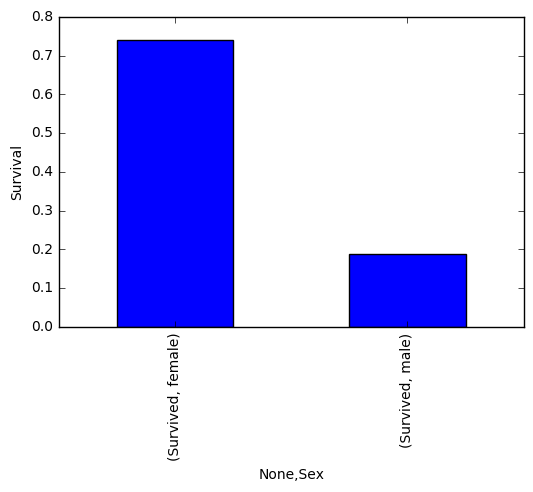

In [49]:
# Exam the average rate of survival of female and male

plot_sex = titanic_clean2.groupby(['Sex'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival')
titanic_clean2.groupby(['Sex' ])[['Survived']].mean()

Looking at the graph above, it is obvious that female survival rate is higher than that of male.

/Users/xiangli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived
Age_categories,
Child,0.503597
Adult,0.360414
Senior,0.356164


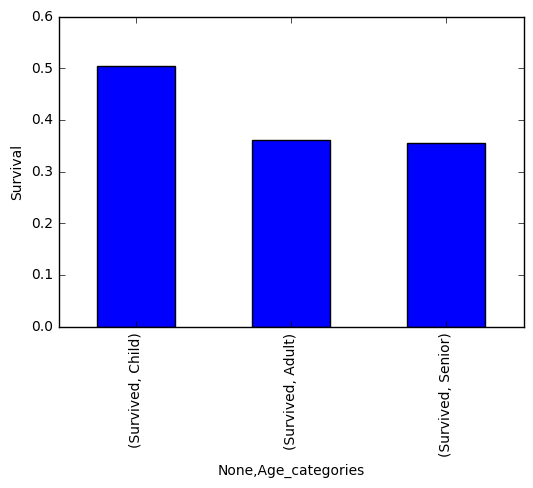

In [50]:
# Exam the average rate of survival of different age group
# Assuming people under the age of 18 are non-adult, 
# people above the age of 18 are adults and people above the age of 49 are seniors

titanic_clean2['Age_categories'] = pd.cut(titanic_clean2['Age'], bins=[0,18,49,90], labels=["Child","Adult","Senior"])
titanic_clean2.groupby(['Age_categories'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival')
titanic_clean2.groupby(['Age_categories' ])[['Survived']].mean()

Looking at the graph above, we can see that children are more likely to survive than adults and seniors. It seems like that the saying "Children and women first" are in effect for Titanic.

Question 5: Are people with higher fare more likely to survive? What about people with higher passenger class?

/Users/xiangli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived
Fare_categories,
Low Fare,0.260664
High Fare,0.506637


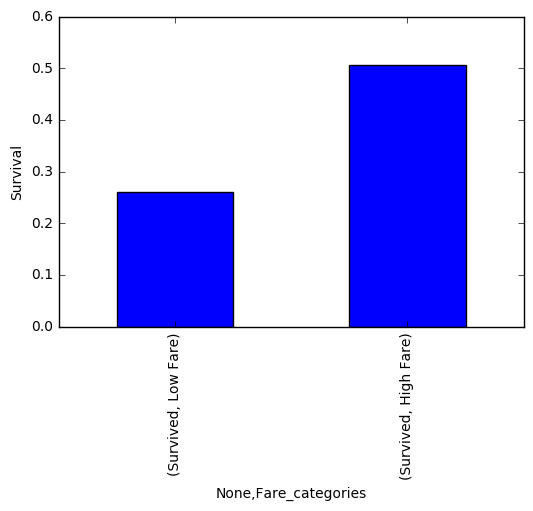

In [51]:
# Exam the average rate of survival across different fares. Assuming fare lower than 
#the median (14) is low fare and fare higher than the median is high fare

titanic_clean2['Fare_categories'] = pd.cut(titanic_clean2['Fare'], bins=[0,14,513], labels=["Low Fare", "High Fare"])
titanic_clean2.groupby(['Fare_categories'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival')
titanic_clean2.groupby(['Fare_categories' ])[['Survived']].mean()

On average, people with higher fare are more likely to survive. This makes sense since some of the people with low fare might be staff on Titanic who chose to not get on the lifeboat.

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


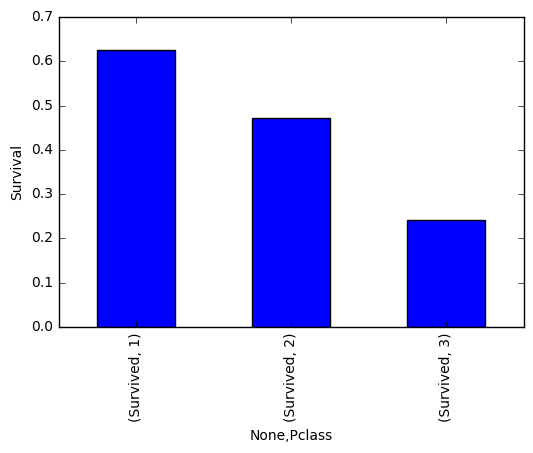

In [52]:
# Exam the average rate of survival across passenger classes

titanic_clean2.groupby(['Pclass'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival')
titanic_clean2.groupby(['Pclass'])[['Survived']].mean()

Based on the graph, it is clear that survival rate across passenger classes are different. 1st class passengers are more likely to survive than 2nd class passengers. 2nd class passengers are more likely to survive than 3rd class passengers.

Question 6: Are people with big family more or less likely to survive?

To answer this question, we first need to create a new variable 'Number of family members abroad' ('Num_fam'). We can approximate this by combing the 'Number of Siblings/Spouses Aboard'
with 'Number of Parents/Children Aboard'.

In [53]:
# Create the new variable 'Num_fam'

titanic_clean2['Num_fam'] = titanic_clean2['SibSp'] + titanic_clean2['Parch']

/Users/xiangli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Survived
Num_fam,
0,0.300935
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


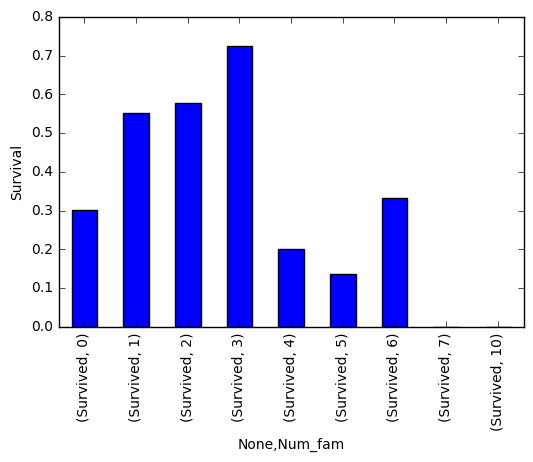

In [54]:
# Exam the average rate of survival across number of family members abroad

titanic_clean2.groupby(['Num_fam'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival')
titanic_clean2.groupby(['Num_fam' ])[['Survived']].mean()

Since we see a clear distinction bewteen number of families members abroad less than 4 and greater or equal to 4, let's group the variable into small family and big family using 4 as the cutoff point.

/Users/xiangli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived
Num_fam_categories,
Small Family,0.560261
Big Family,0.148936


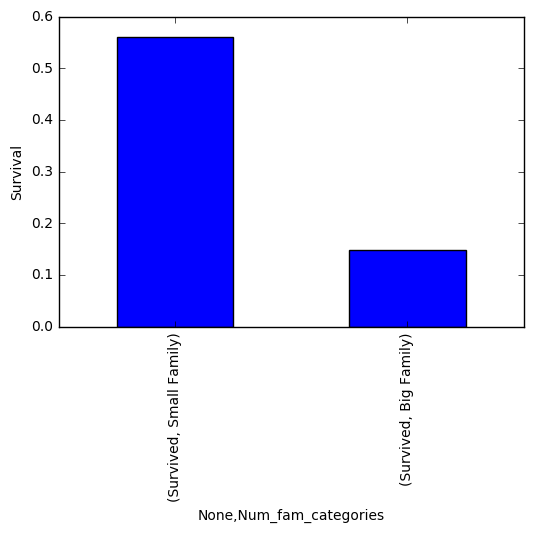

In [55]:
# Exam the average rate of survival across number of family members abroad
# Assuming family member lower than 4 is counted as small family and otherwise is counted as big family

titanic_clean2['Num_fam_categories'] = pd.cut(titanic_clean2['Num_fam'], bins=[0,4,10], labels=["Small Family", "Big Family"])
titanic_clean2.groupby(['Num_fam_categories'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival')
titanic_clean2.groupby(['Num_fam_categories' ])[['Survived']].mean()

Passenger with more family members aborad has a lower average survival rate. Intuitively, this makes logical sense since someone with a lot of family members might choose to let their family members to get on the lifeboat first.

### Conclusion

Through this analysis, we gained plenty of insights of the Titanic data set. In particular, we learnt what factors had influences on a passenger's likelihood to survive by using a decision tree classifier model and looking at various descriptive data and visualizations.

To further improve the analysis, different types of machine learning methods can be used to increase the accuracy of the predictions. Logistic regression and random forest are good alternatives to the decision tree method.

